In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import EDA
EDA

EDA lib ready


<module 'EDA' from 'f:\\Programacion\\1.BOOTCAMP\\Proyectos\\Oceans_7_Project\\EDA.py'>

In [4]:
kali = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\trabajo_interdisciplinar\Nav_normal_Kali_DV_07_07_20.csv')
kali.head(1)

,No.,Time,Time delta from previous captured frame,Source,Source Port,Source GeoIP,Destination,Destination Port,Destination GeoIP,Protocol,Length,Request Method,Info
0,1,0.0,0.0,fe80::75b4:55d7:3934:5701,NaN,NaN,ff02::c,NaN,NaN,SSDP,208,M-SEARCH,M-SEARCH * HTTP/1.1


In [5]:
EDA.general_info(kali)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237952 entries, 0 to 237951
Data columns (total 13 columns):
No.                                        237952 non-null int64
Time                                       237952 non-null float64
Time delta from previous captured frame    237952 non-null float64
Source                                     237952 non-null object
Source Port                                235939 non-null float64
Source GeoIP                               128081 non-null object
Destination                                237952 non-null object
Destination Port                           235939 non-null float64
Destination GeoIP                          57623 non-null object
Protocol                                   237952 non-null object
Length                                     237952 non-null int64
Request Method                             344 non-null object
Info                                       237952 non-null obje

In [14]:
kali.columns = ['index', 'time', 'duration', 'source',
       'src_port', 'src_geo', 'destination', 'dest_port',
       'dest_geo', 'protocol', 'length', 'request_method', 'info']

# kali_frame

In [15]:
kali_time = kali[['index','time', 'duration']]
kali_time

,index,time,duration
0,1,0.000000,0.000000
1,2,0.819647,0.819647
2,3,2.764659,1.945012
3,4,2.969683,0.205024
4,5,4.508258,1.538575
...,...,...,...
237947,237948,736.175255,0.204765
237948,237949,738.018782,1.843527
237949,237950,738.633338,0.614556
237950,237951,739.863738,1.230400


In [9]:
kali_time['time'].describe()

count    237952.000000
mean        435.759091
std         204.350423
min           0.000000
25%         323.374004
50%         489.284826
75%         611.768936
max         740.271599
Name: time, dtype: float64

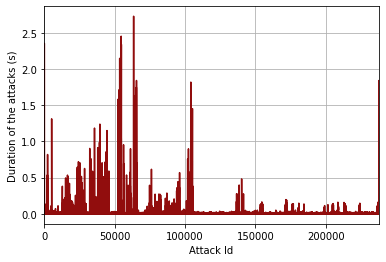

In [11]:
kali_time['duration'].plot(colors = 'darkred', alpha = 0.95, grid = 'darkgrid')
plt.xlabel('Attack Id')
plt.ylabel('Duration of the attacks (s)')
# fig.savefig('test.jpg')
plt.show()

# kali_ip

In [16]:
kali.columns

Index(['index', 'time', 'duration', 'source', 'src_port', 'src_geo',
       'destination', 'dest_port', 'dest_geo', 'protocol', 'length',
       'request_method', 'info'],
      dtype='object')

In [18]:
kali_local = kali[['index' , 'source', 'src_port', 'src_geo',
       'destination', 'dest_port', 'dest_geo']]
kali_local.head(2)

,index,source,src_port,src_geo,destination,dest_port,dest_geo
0,1,fe80::75b4:55d7:3934:5701,NaN,NaN,ff02::c,NaN,NaN
1,2,fe80::fa8e:85ff:fec6:2c8b,NaN,NaN,ff02::1,NaN,NaN


In [19]:
EDA.null_count(kali_local)

Presence of null in clolumns:
index          False
source         False
src_port        True
src_geo         True
destination    False
dest_port       True
dest_geo        True
dtype: bool

Number of null in columns:
index               0
source              0
src_port         2013
src_geo        109871
destination         0
dest_port        2013
dest_geo       180329
dtype: int64


In [20]:
EDA.value_counter(kali_local)


index:
2047      1
147997    1
197173    1
199220    1
209459    1
         ..
169208    1
191735    1
189686    1
195829    1
2049      1
Name: index, Length: 237952, dtype: int64
----------------

source:
192.168.1.64                 76064
104.18.227.100               43743
151.101.133.186              33641
151.101.134.109              20293
74.125.97.169                17802
                             ...  
fe80::5eaa:fdff:fe03:69e4        1
13.224.113.11                    1
192.168.1.108                    1
192.168.1.59                     1
13.224.113.90                    1
Name: source, Length: 201, dtype: int64
----------------

src_port:
443.0      155381
48456.0     17405
34766.0     13571
38288.0      9007
80.0         4999
            ...  
57558.0         2
42528.0         2
42526.0         2
57588.0         2
38096.0         2
Name: src_port, Length: 426, dtype: int64
----------------

src_geo:
Madrid, ES           63464
US                   55506
Mountain View, US 

# kali_http

In [23]:
kali.columns

Index(['index', 'time', 'duration', 'source', 'src_port', 'src_geo',
       'destination', 'dest_port', 'dest_geo', 'protocol', 'length',
       'request_method', 'info'],
      dtype='object')

In [25]:
kali_protocol = kali[['index', 'protocol', 'length', 'request_method', 'info']]
kali_protocol.head()

,index,protocol,length,request_method,info
0,1,SSDP,208,M-SEARCH,M-SEARCH * HTTP/1.1
1,2,ICMPv6,86,NaN,Router Advertisement from f8:8e:85:c6:2c:8b
2,3,ARP,60,NaN,Who has 192.168.1.1? Tell 192.168.1.46
3,4,SSDP,208,M-SEARCH,M-SEARCH * HTTP/1.1
4,5,UDP,712,NaN,58611 > 29810 Len=670


In [26]:
EDA.null_count(kali_protocol)

Presence of null in clolumns:
index             False
protocol          False
length            False
request_method     True
info              False
dtype: bool

Number of null in columns:
index                  0
protocol               0
length                 0
request_method    237608
info                   0
dtype: int64


In [27]:
EDA.null_count(kali_protocol)

Presence of null in clolumns:
index             False
protocol          False
length            False
request_method     True
info              False
dtype: bool

Number of null in columns:
index                  0
protocol               0
length                 0
request_method    237608
info                   0
dtype: int64


In [28]:
EDA.value_counter(kali_protocol)


index:
2047      1
147997    1
197173    1
199220    1
209459    1
         ..
169208    1
191735    1
189686    1
195829    1
2049      1
Name: index, Length: 237952, dtype: int64
----------------

protocol:
TCP        198121
TLSv1.2     20148
TLSv1.3     17436
DNS          1011
SSDP          228
ARP           175
OCSP          169
IGMPv2        164
UDP           104
ICMPv6         99
DHCPv6         96
MDNS           86
HTTP           58
RIPv2          23
NBNS           14
BROWSER         7
SSLv2           6
LLMNR           4
DHCP            2
ICMP            1
Name: protocol, dtype: int64
----------------

length:
1386    63979
1506    54356
66      50400
54      20768
1462    17505
        ...  
1064        1
1480        1
883         1
821         1
1252        1
Name: length, Length: 1314, dtype: int64
----------------

request_method:
M-SEARCH    213
POST         84
GET          32
NOTIFY       15
Name: request_method, dtype: int64
----------------

info:
Application Data       

Nueva herramienta proporciona mucho mejores resultados